In [2]:
import pandas as pd


In [3]:
pip install markdown-it-py

Note: you may need to restart the kernel to use updated packages.


In [3]:
df = pd.read_parquet('CroqPain.parquet')
df.head()

,STOR,EARN,K,SIZE,EMPL,total,P15,P25,P35,P45,P55,INC,COMP,NCOMP,NREST,PRICE,CLI,CITY
0,1,28339.672620,861.0718,129,14.0,8.58,0.98,1.28,0.56,1.00,3.10,27.6,8,1,45,16.1,129,
1,2,-1.455001,630.3028,91,12.0,8.46,1.29,0.72,1.20,1.49,3.10,28.3,2,2,27,11.4,116,
2,3,68.932678,1074.4360,140,13.0,19.25,2.94,2.49,3.71,4.03,5.27,30.2,5,4,5,21.7,142,
3,4,202.073327,882.0064,184,7.0,20.92,3.57,4.93,4.42,4.30,2.96,27.6,2,1,7,11.8,138,
4,5,115.778511,930.6688,144,14.0,11.66,1.70,1.14,2.20,2.14,2.63,33.9,1,3,25,16.6,126,


array([[<Axes: title={'center': 'STOR'}>,
        <Axes: title={'center': 'EARN'}>, <Axes: title={'center': 'K'}>,
        <Axes: title={'center': 'SIZE'}>],
       [<Axes: title={'center': 'EMPL'}>,
        <Axes: title={'center': 'total'}>,
        <Axes: title={'center': 'P15'}>, <Axes: title={'center': 'P25'}>],
       [<Axes: title={'center': 'P35'}>, <Axes: title={'center': 'P45'}>,
        <Axes: title={'center': 'P55'}>, <Axes: title={'center': 'INC'}>],
       [<Axes: title={'center': 'COMP'}>,
        <Axes: title={'center': 'NCOMP'}>,
        <Axes: title={'center': 'NREST'}>,
        <Axes: title={'center': 'PRICE'}>],
       [<Axes: title={'center': 'CLI'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

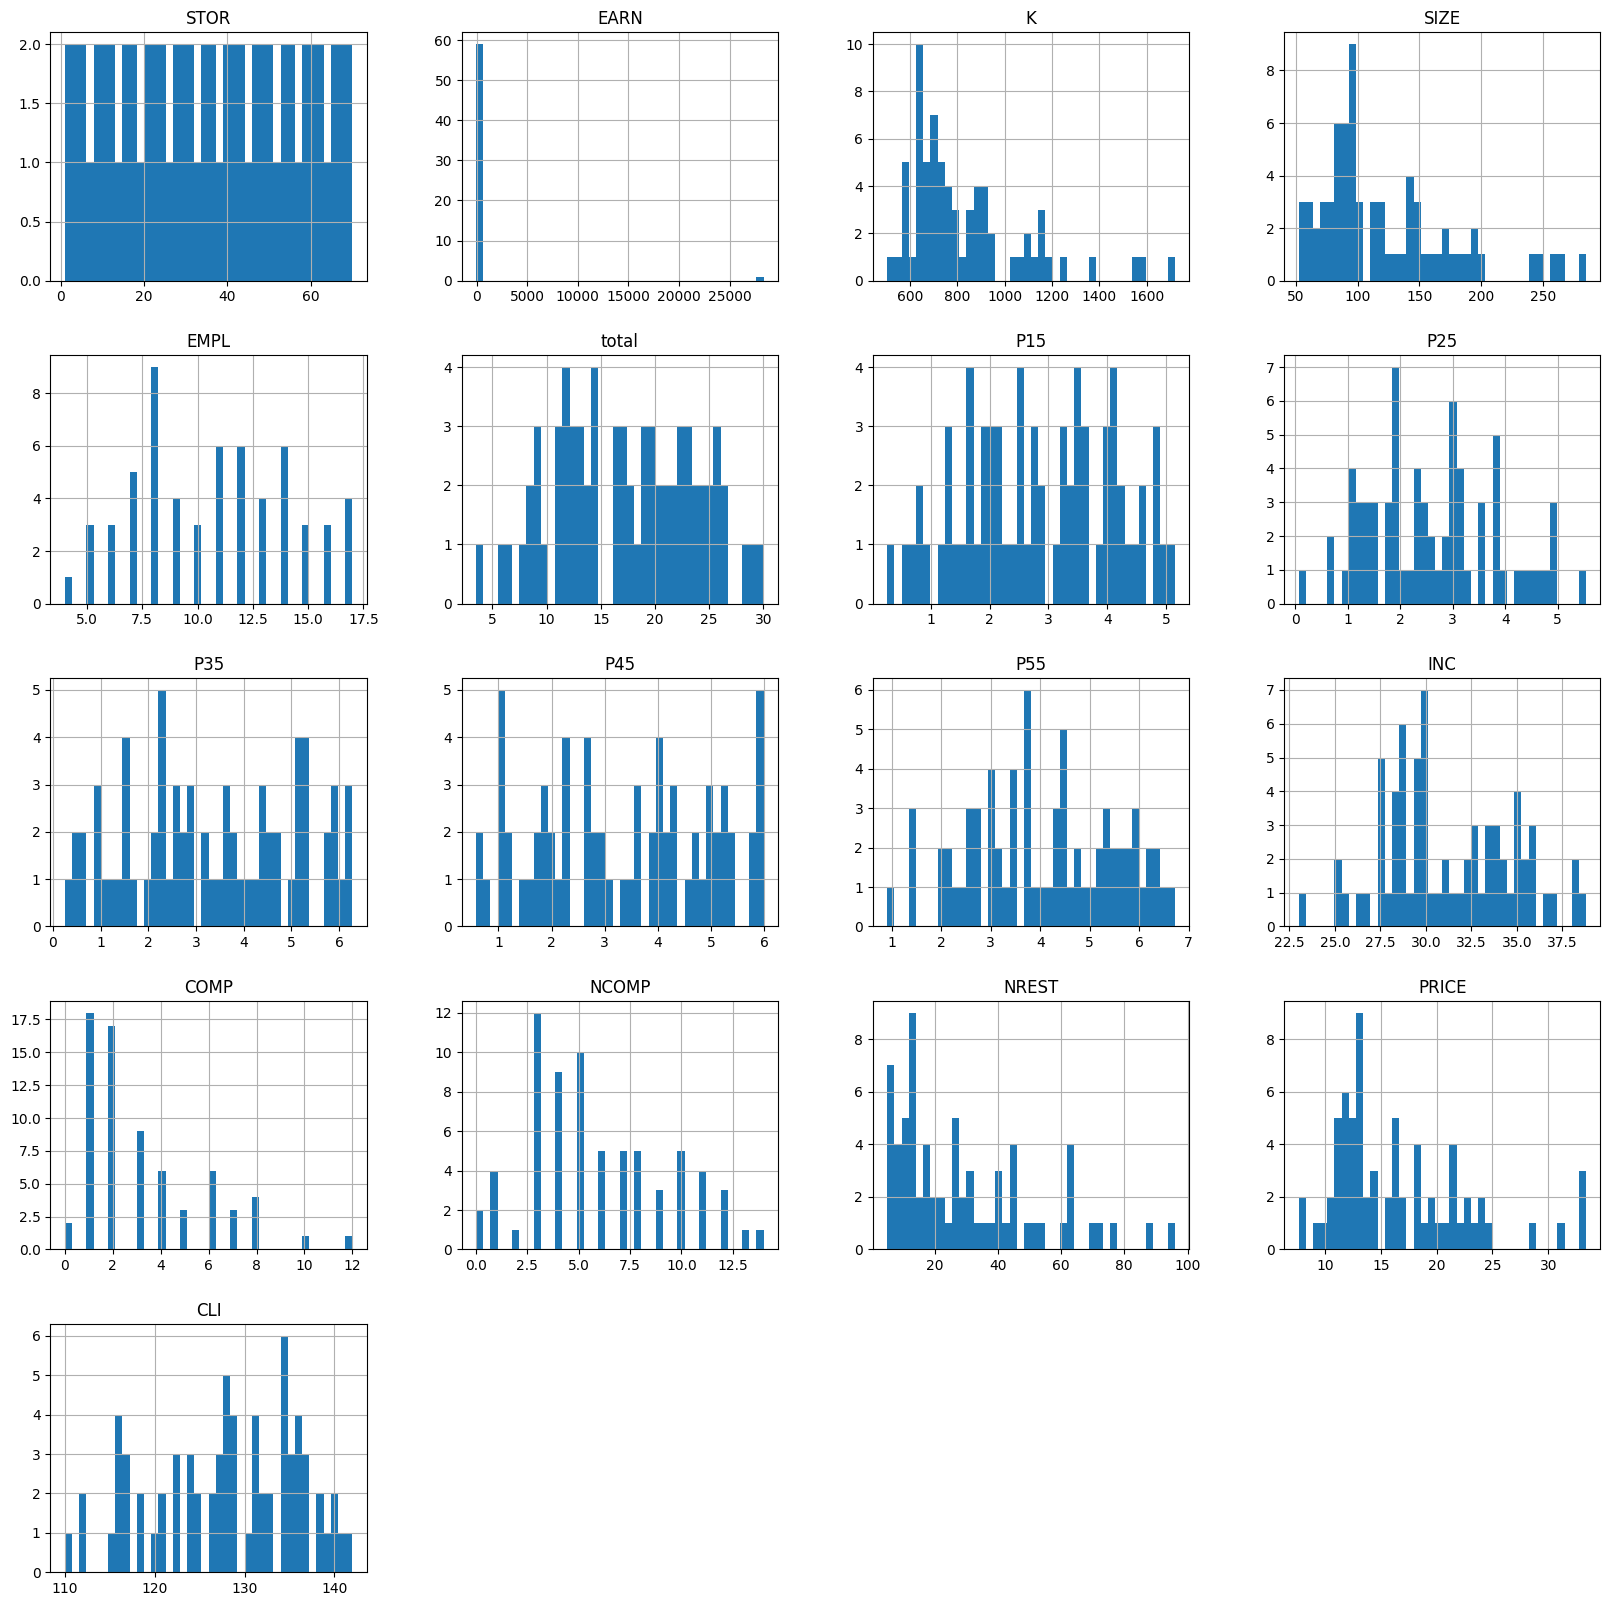

In [4]:
# Creating histograms for each column to identify potential data issues

df.hist(figsize=(20, 20), bins=40)

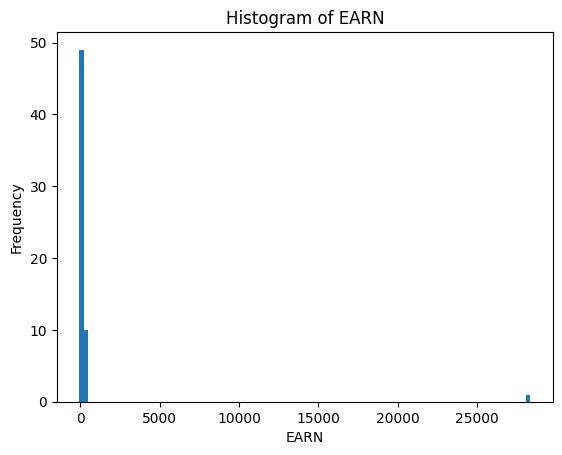

In [6]:
#Investigating the EARN histogram
from matplotlib import pyplot as plt
plt.hist(df['EARN'], bins=100)
plt.xlabel('EARN')
plt.ylabel('Frequency')
plt.title('Histogram of EARN')
plt.show()

In [8]:
#Finding the outlier
outlier_store = df[df['EARN']==df['EARN'].max()]['STOR']
outlier_store

0    1
Name: STOR, dtype: int32

## It is evident that the operational earnings of the first store are significantly higher than the others. As this was the first store that opened, the skewness is caused due to initial marketing efforts, location advantages, or other factors that aren't replicable in other stores. The first store's EARN data would cause abnormalities in the model. Hence, we will replace the first store's operational earnings with the median value of the EARN column.

In [10]:
#Creating a copy of the df and replacing the EARN value of STOR 1 with the median value of EARN column
import numpy as np
CroqPainFix = df.copy()
CroqPainFix['EARN'] = np.where(CroqPainFix['EARN']==CroqPainFix[CroqPainFix['STOR']==outlier_store.values[0]]['EARN'].values[0], CroqPainFix['EARN'].median(), CroqPainFix['EARN'])
CroqPainFix = CroqPainFix[:-10]
CroqPainFix.head()

,STOR,EARN,K,SIZE,EMPL,total,P15,P25,P35,P45,P55,INC,COMP,NCOMP,NREST,PRICE,CLI,CITY
0,1,140.702808,861.0718,129,14.0,8.58,0.98,1.28,0.56,1.00,3.10,27.6,8,1,45,16.1,129,
1,2,-1.455001,630.3028,91,12.0,8.46,1.29,0.72,1.20,1.49,3.10,28.3,2,2,27,11.4,116,
2,3,68.932678,1074.4360,140,13.0,19.25,2.94,2.49,3.71,4.03,5.27,30.2,5,4,5,21.7,142,
3,4,202.073327,882.0064,184,7.0,20.92,3.57,4.93,4.42,4.30,2.96,27.6,2,1,7,11.8,138,
4,5,115.778511,930.6688,144,14.0,11.66,1.70,1.14,2.20,2.14,2.63,33.9,1,3,25,16.6,126,


# Part A

array([[<Axes: title={'center': 'STOR'}>,
        <Axes: title={'center': 'EARN'}>, <Axes: title={'center': 'K'}>,
        <Axes: title={'center': 'SIZE'}>],
       [<Axes: title={'center': 'EMPL'}>,
        <Axes: title={'center': 'total'}>,
        <Axes: title={'center': 'P15'}>, <Axes: title={'center': 'P25'}>],
       [<Axes: title={'center': 'P35'}>, <Axes: title={'center': 'P45'}>,
        <Axes: title={'center': 'P55'}>, <Axes: title={'center': 'INC'}>],
       [<Axes: title={'center': 'COMP'}>,
        <Axes: title={'center': 'NCOMP'}>,
        <Axes: title={'center': 'NREST'}>,
        <Axes: title={'center': 'PRICE'}>],
       [<Axes: title={'center': 'CLI'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

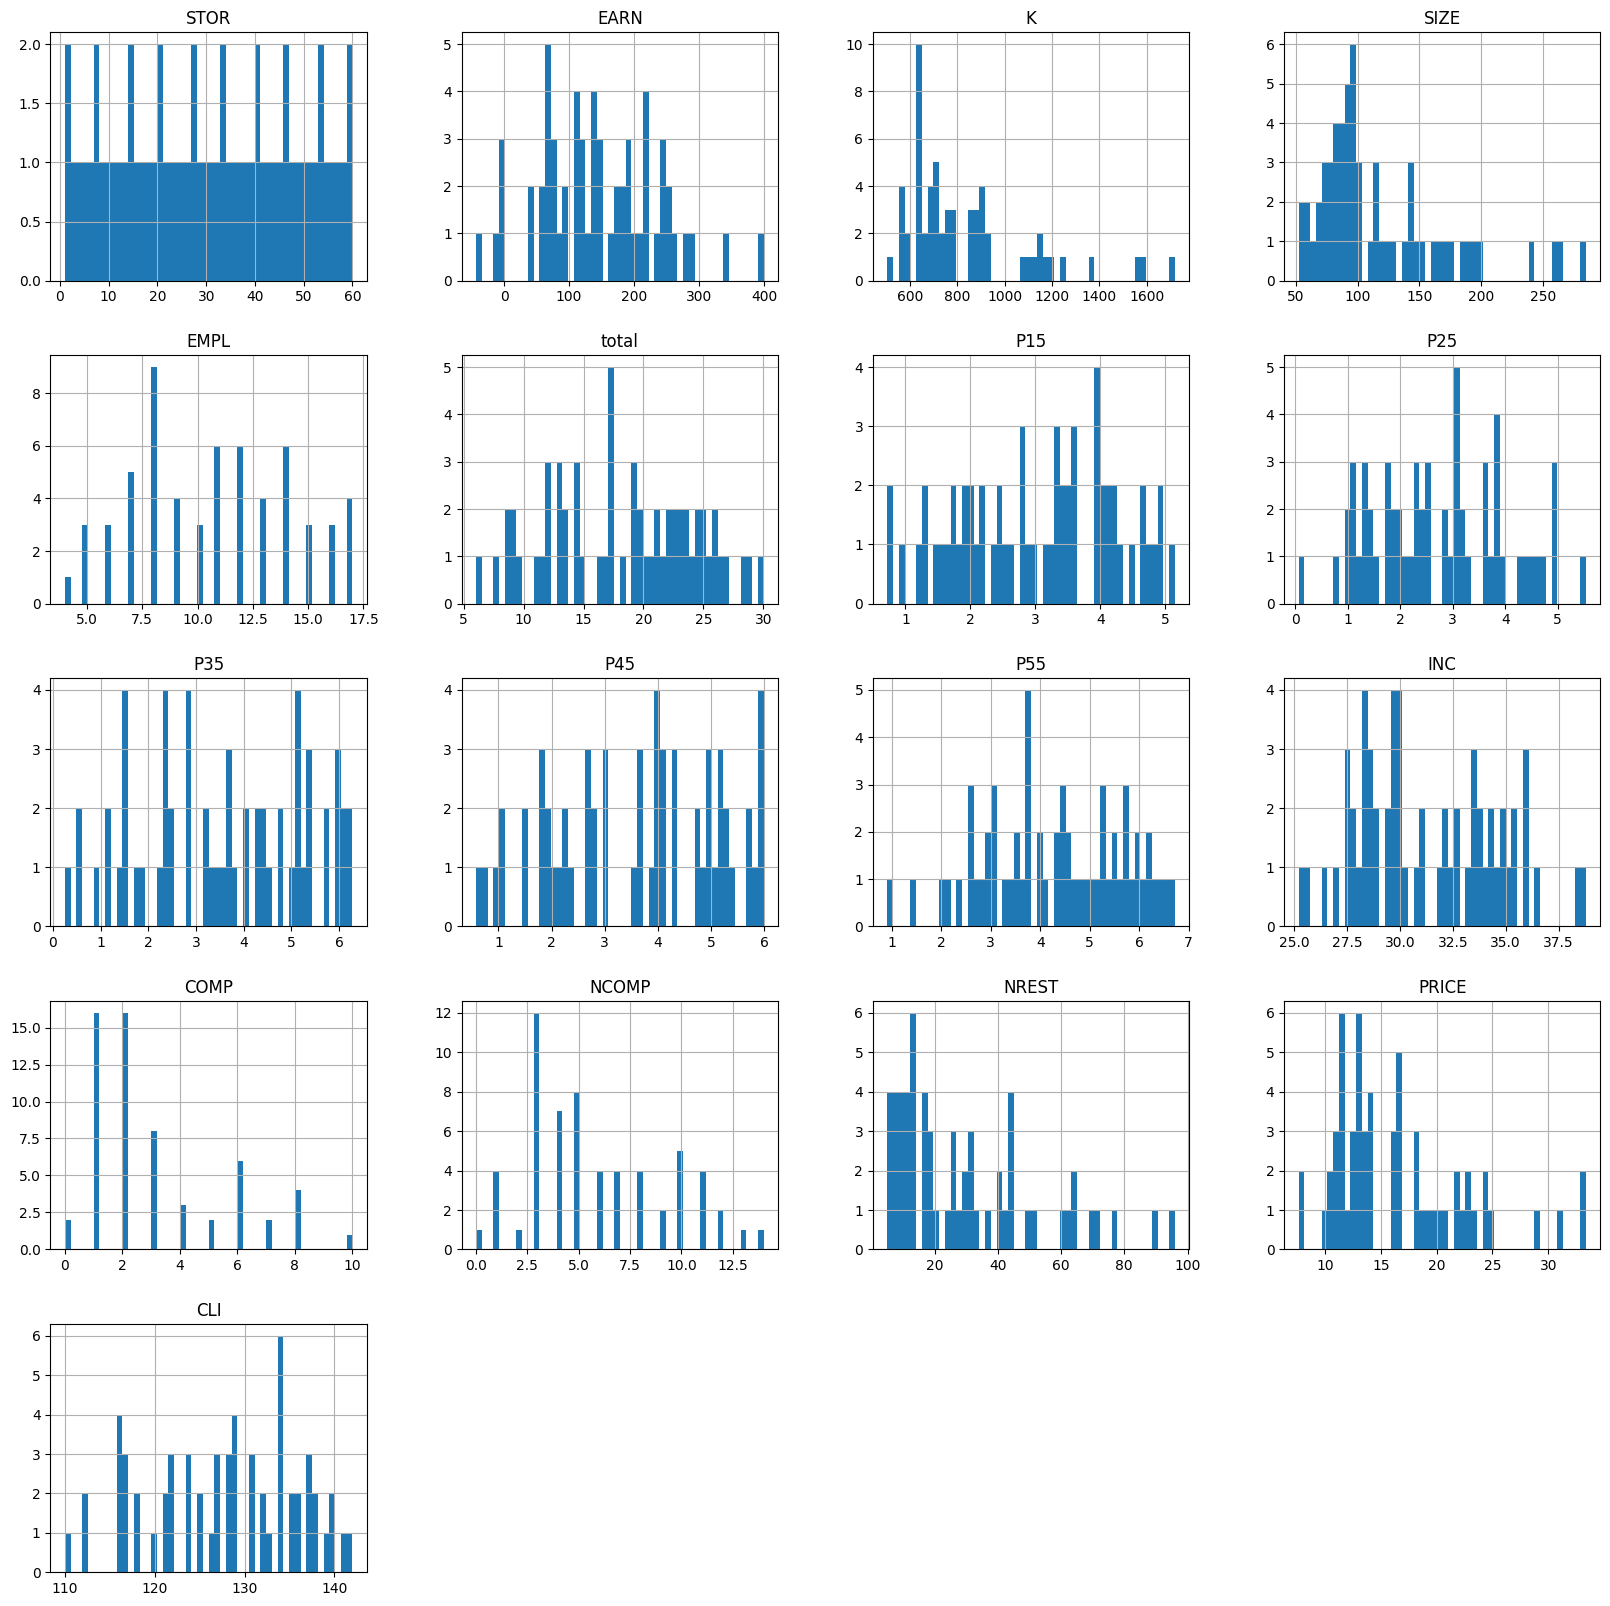

In [11]:
#Visualizing the CroqPainFix dataframe
CroqPainFix.hist(figsize=(20, 20), bins=50)

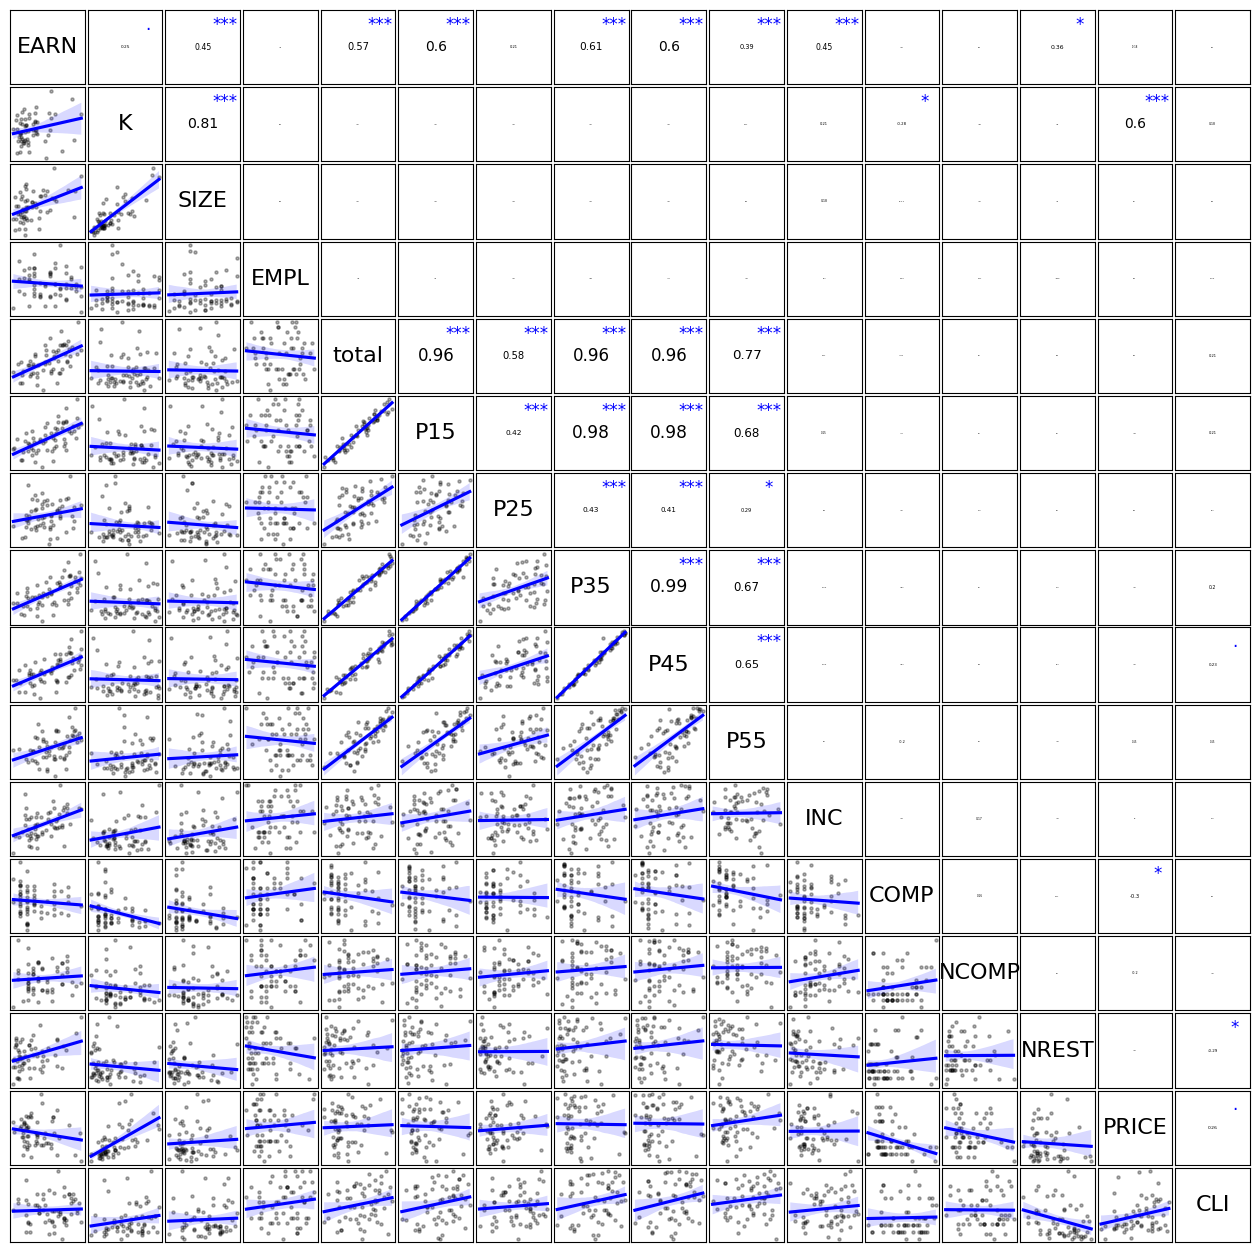

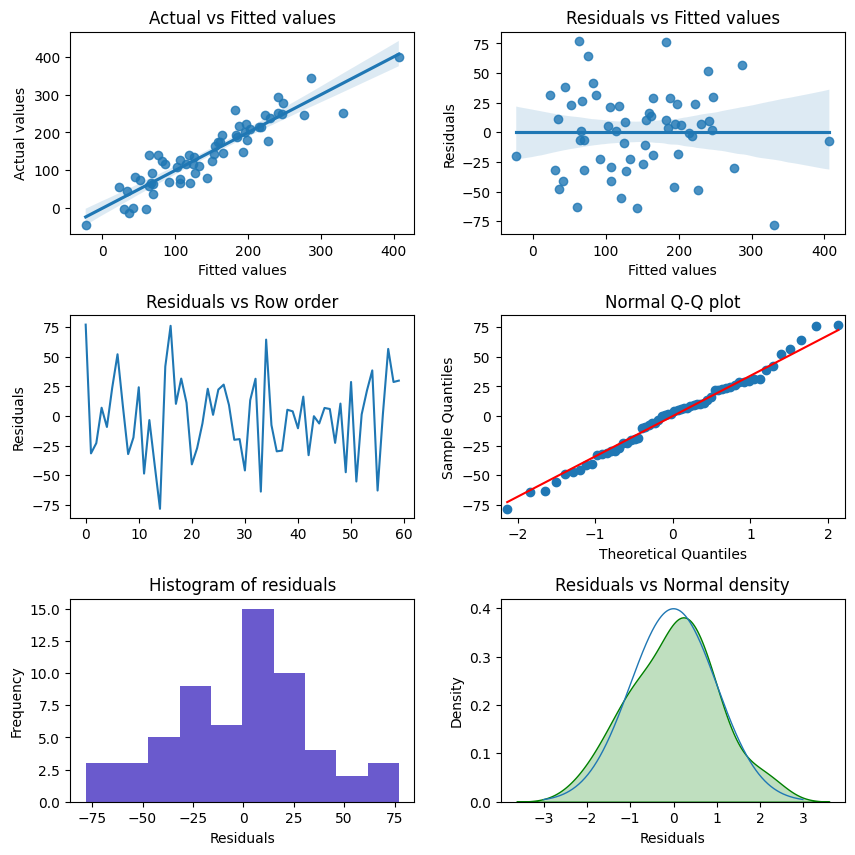

In [43]:
#Exploration of correlation patterns
import pyrsm as rsm
regression_0 = rsm.regress({"CroqPainFix": CroqPainFix}, rvar='EARN', evar=['K', 'SIZE', 'EMPL', 'total', 'P15','P25','P35','P45','P55', 'INC', 'COMP', 'NCOMP', 'NREST', 'PRICE', 'CLI'])
regression_0.plot('correlation')
regression_0.plot('dashboard')

### This correlation matrix shows that all variables except for levels of employment, levels of competition within a 1 KM radius, and the price of rent per square foot of retail space rented have positive relationships with Earnings, with levels of population having the highest correlation. This makes sense as the more people there are within an area, the more potential customers a business has to attempt to sell a product to. For the few negative correlations, competition and price of rent make sense as well. The more competition there is, the more difficult it is to sell a product, and the higher the price of rent, the less money a business has to spend on other things such as advertising, inventory, etc. Employment levels stand out as the only out of place negative correlation, as more employees should allow more sales to be made assuming all employees are working towards securing more sales, however when considering higher rates of employment, it is possible that you could end up with more employees than needed, and paying wages to employees that are not needed could be a waste of money.

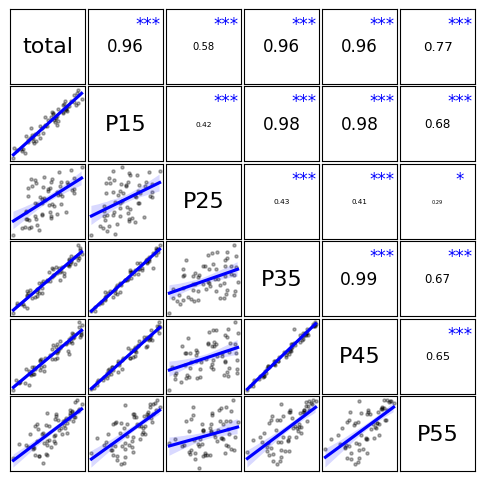

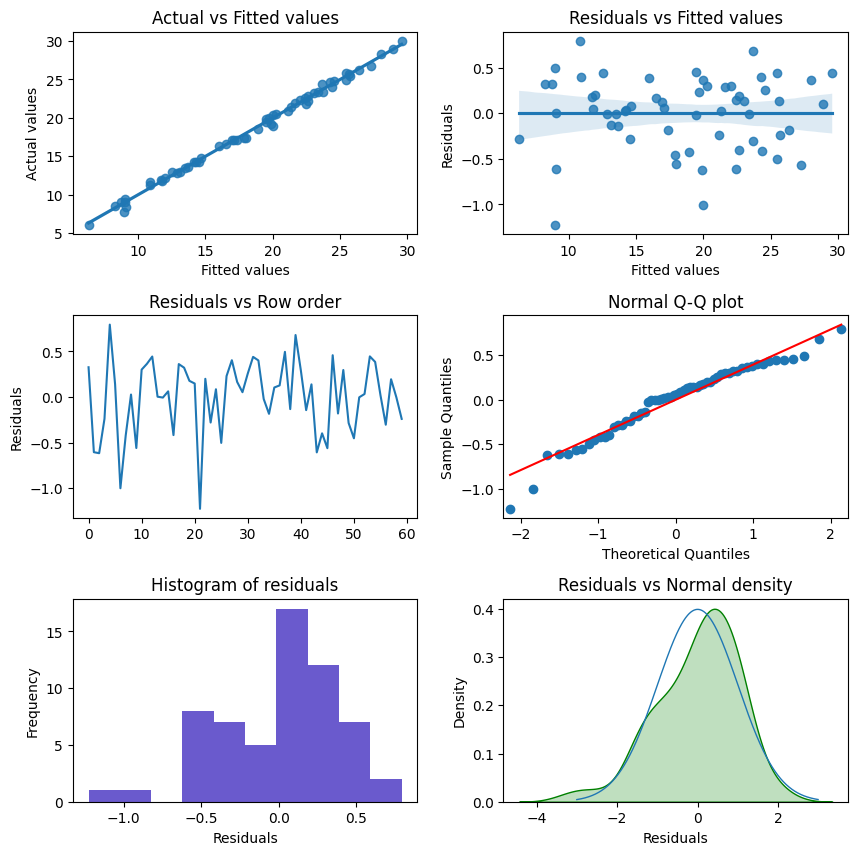

In [41]:
#Conducting regression with total as response variable and P15 through P55 as explanatory variables
import pyrsm as rsm
regression_1 = rsm.regress({"CroqPainFix": CroqPainFix}, rvar='total', evar=['P15','P25','P35','P45','P55'])
regression_1.plot('correlation')
regression_1.plot('dashboard')

### The plot shows a strong positive correlation between the total population and the number of individuals in each age group within a 3 km radius. Higher total populations correspond to higher counts in each age category, which is expected since these age groups contribute to the total demographic. The correlation is slightly weaker for those above 55 but remains positive, aligning with standard demographic distribution patterns.

In [42]:
#Adjusting the data by dividing the counts of each age group, from P15 to P55, by the total population to normalize the figures.

CroqPainFix_corr_trans = CroqPainFix.copy()

CroqPainFix_corr_trans['EARN_total'] = CroqPainFix_corr_trans['EARN'] / CroqPainFix_corr_trans['total']
CroqPainFix_corr_trans['P15_total'] = CroqPainFix_corr_trans['P15'] / CroqPainFix_corr_trans['total']
CroqPainFix_corr_trans['P25_total'] = CroqPainFix_corr_trans['P25'] / CroqPainFix_corr_trans['total']
CroqPainFix_corr_trans['P35_total'] = CroqPainFix_corr_trans['P35'] / CroqPainFix_corr_trans['total']
CroqPainFix_corr_trans['P45_total'] = CroqPainFix_corr_trans['P45'] / CroqPainFix_corr_trans['total']
CroqPainFix_corr_trans['P55_total'] = CroqPainFix_corr_trans['P55'] / CroqPainFix_corr_trans['total']


columns_to_drop = ['EARN', 'P15', 'P25', 'P35', 'P45', 'P55']
# Drop the specified columns
CroqPainFix_corr_trans = CroqPainFix_corr_trans.drop(columns=columns_to_drop)

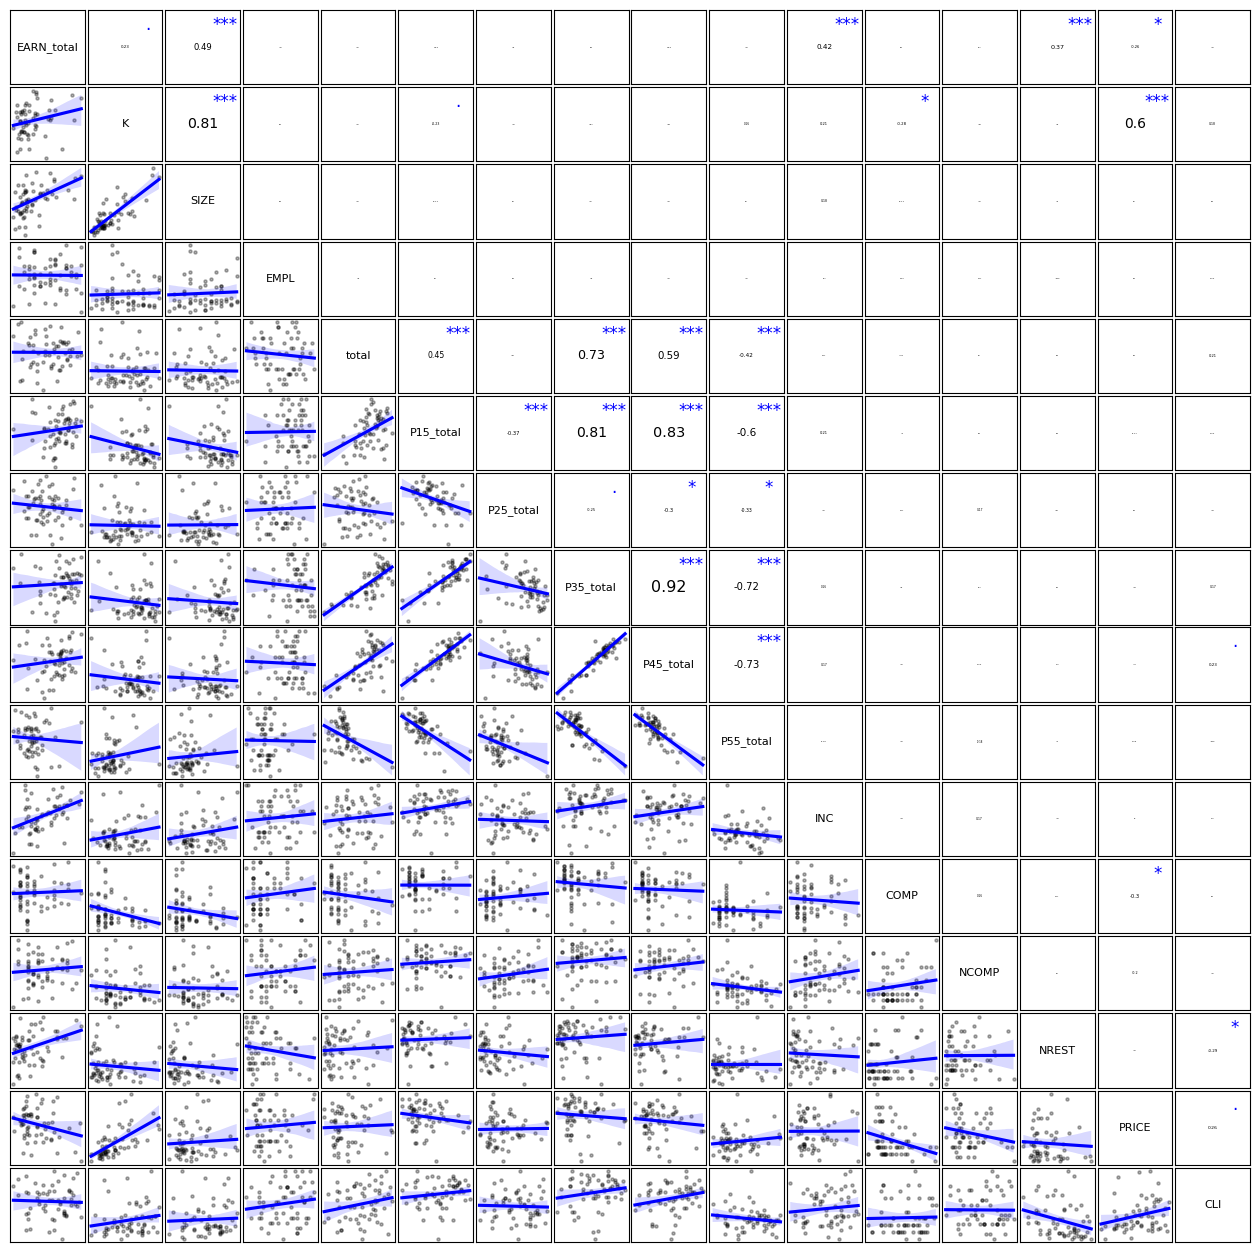

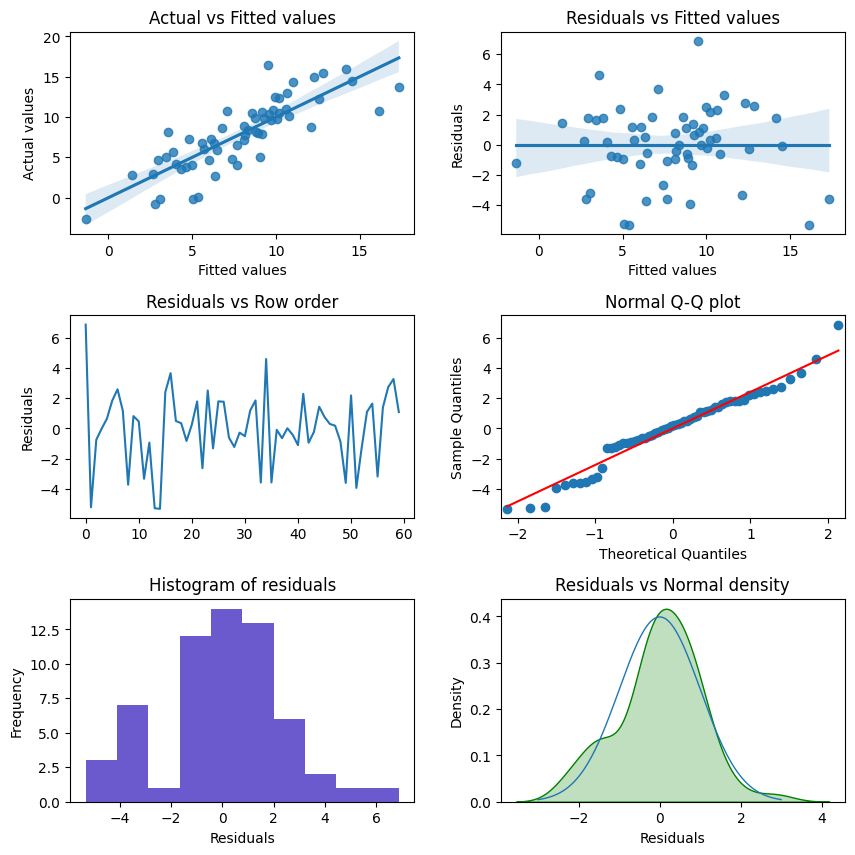

In [17]:
#Conducting regression on transformed data considering the effect of all the variables on operational earnings
regression_x = rsm.regress({"CroqPainFix_corr_trans": CroqPainFix_corr_trans}, rvar='EARN_total', evar=['K', 'SIZE', 'EMPL', 'total', 'P15_total','P25_total','P35_total','P45_total','P55_total', 'INC', 'COMP', 'NCOMP', 'NREST', 'PRICE', 'CLI'])
regression_x.plot('correlation')
regression_x.plot('dashboard')

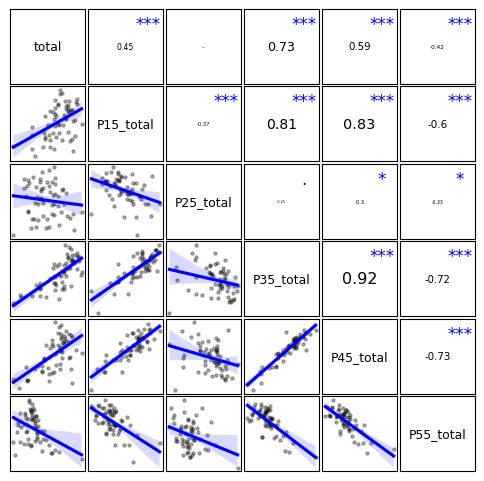

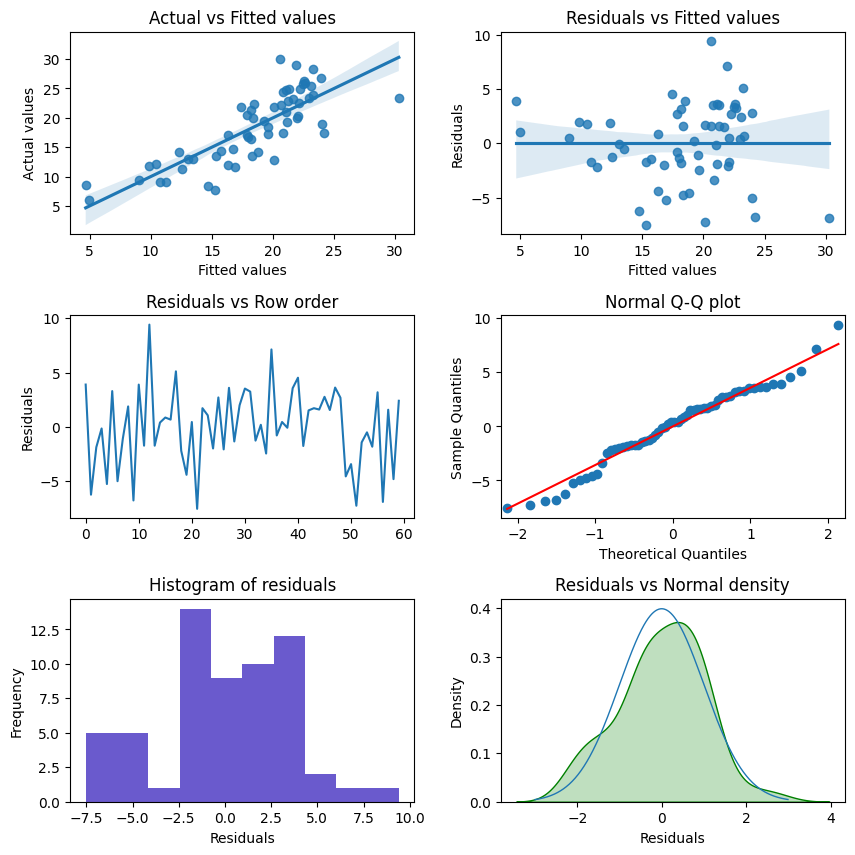

In [18]:
#Conducting regression with total as response variable and P15_total through P55_total as explanatory variables

regression_1_transform = rsm.regress({"CroqPainFix_corr_trans": CroqPainFix_corr_trans}, rvar='total', evar=['P15_total','P25_total','P35_total','P45_total','P55_total'])
regression_1_transform.plot('correlation')
regression_1_transform.plot('dashboard')

## This graph illustrates a decrease in the correlation values after a transformation has been applied to the data. This suggests that the transformation may have altered the relationships between the variables, resulting in lower correlation coefficients.

Linear regression (OLS)
Data                 : CroqPainFix
Response variable    : EARN
Explanatory variables: K, SIZE, EMPL, total, P15, P25, P35, P45, P55, INC, COMP, NCOMP, NREST, PRICE, CLI
Null hyp.: the effect of x on EARN is zero
Alt. hyp.: the effect of x on EARN is not zero

           coefficient  std.error  t.value p.value     
Intercept      -421.59    105.914   -3.981  < .001  ***
K                -0.19      0.116   -1.646   0.107     
SIZE              1.51      0.451    3.346   0.002   **
EMPL             -1.33      1.616   -0.823   0.415     
total            -1.57     13.619   -0.115   0.909     
P15              54.65     28.938    1.888   0.066    .
P25               2.40     14.590    0.165    0.87     
P35              -2.06     23.630   -0.087   0.931     
P45              -6.45     34.528   -0.187   0.853     
P55               2.98     15.030    0.198   0.844     
INC               9.59      1.849    5.188  < .001  ***
COMP             -0.55      2.434   -0.225  

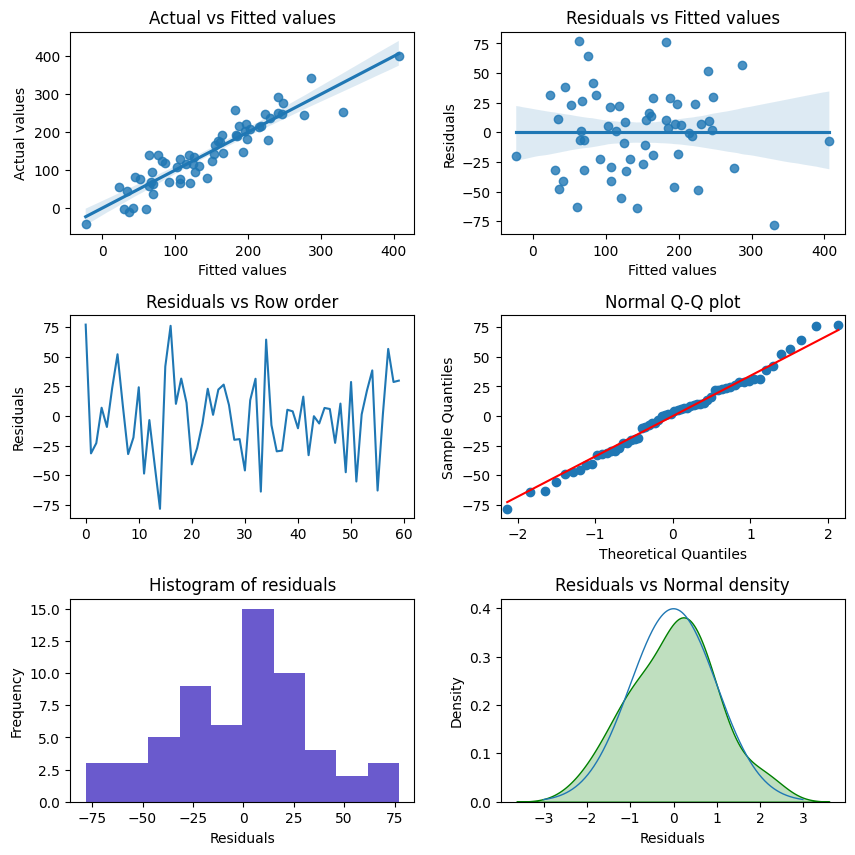

In [19]:
#Conducting regression on untransformed data considering the effect of all the variables on operational earnings

regression_2 = rsm.regress({"CroqPainFix": CroqPainFix}, rvar='EARN', evar=['K', 'SIZE', 'EMPL', 'total', 'P15', 'P25', 'P35', 'P45', 'P55', 'INC', 'COMP', 'NCOMP', 'NREST', 'PRICE', 'CLI'])
regression_2.summary(vif=True)
regression_2.plot('dashboard')

High multicollinearity observed in the model, specifically with elevated VIF values for variables like 'total,' 'P45,' 'P35,' and 'P15,' indicates strong correlations among these predictors. This multicollinearity undermines the reliability of coefficient estimates and complicates the interpretation of individual variable effects on the outcome.

Given these findings, it is recommended not to proceed with this model.

## Transformation of variables as instructed

In [20]:
CroqPainFix_t = CroqPainFix.copy()

CroqPainFix_t['EARN_total'] = CroqPainFix_t['EARN'] / CroqPainFix_t['total']
CroqPainFix_t['P15_total'] = CroqPainFix_t['P15'] / CroqPainFix_t['total']
CroqPainFix_t['P25_total'] = CroqPainFix_t['P25'] / CroqPainFix_t['total']
CroqPainFix_t['P35_total'] = CroqPainFix_t['P35'] / CroqPainFix_t['total']
CroqPainFix_t['P45_total'] = CroqPainFix_t['P45'] / CroqPainFix_t['total']
CroqPainFix_t['P55_total'] = CroqPainFix_t['P55'] / CroqPainFix_t['total']
CroqPainFix_t['COMP_total'] = CroqPainFix_t['COMP'] / CroqPainFix_t['total']
CroqPainFix_t['NCOMP_total'] = CroqPainFix_t['NCOMP'] / CroqPainFix_t['total']
CroqPainFix_t['NREST_total'] = CroqPainFix_t['NREST'] / CroqPainFix_t['total']

In [21]:
columns_to_drop = ['EARN', 'P15', 'P25', 'P35', 'P45', 'P55', 'COMP', 'NCOMP', 'NREST']
# Drop the specified columns
CroqPainFix_t = CroqPainFix_t.drop(columns=columns_to_drop)

In [22]:
CroqPainFix_t.shape

(60, 18)

Linear regression (OLS)
Data                 : CroqPainFix_t
Response variable    : EARN_total
Explanatory variables: K, SIZE, EMPL, total, P15_total, P25_total, P35_total, P45_total, P55_total, INC, COMP_total, NCOMP_total, NREST_total, PRICE, CLI
Null hyp.: the effect of x on EARN_total is zero
Alt. hyp.: the effect of x on EARN_total is not zero

             coefficient  std.error  t.value p.value     
Intercept         -18.35     13.286   -1.381   0.174     
K                  -0.02      0.008   -1.967   0.056    .
SIZE                0.10      0.031    3.429   0.001   **
EMPL               -0.12      0.112   -1.104   0.276     
total               0.13      0.109    1.198   0.237     
P15_total          46.54     32.373    1.438   0.158     
P25_total          -4.83     14.648   -0.329   0.743     
P35_total         -16.47     29.480   -0.559   0.579     
P45_total         -19.70     34.953   -0.564   0.576     
P55_total         -14.50     15.478   -0.937   0.354     
INC       

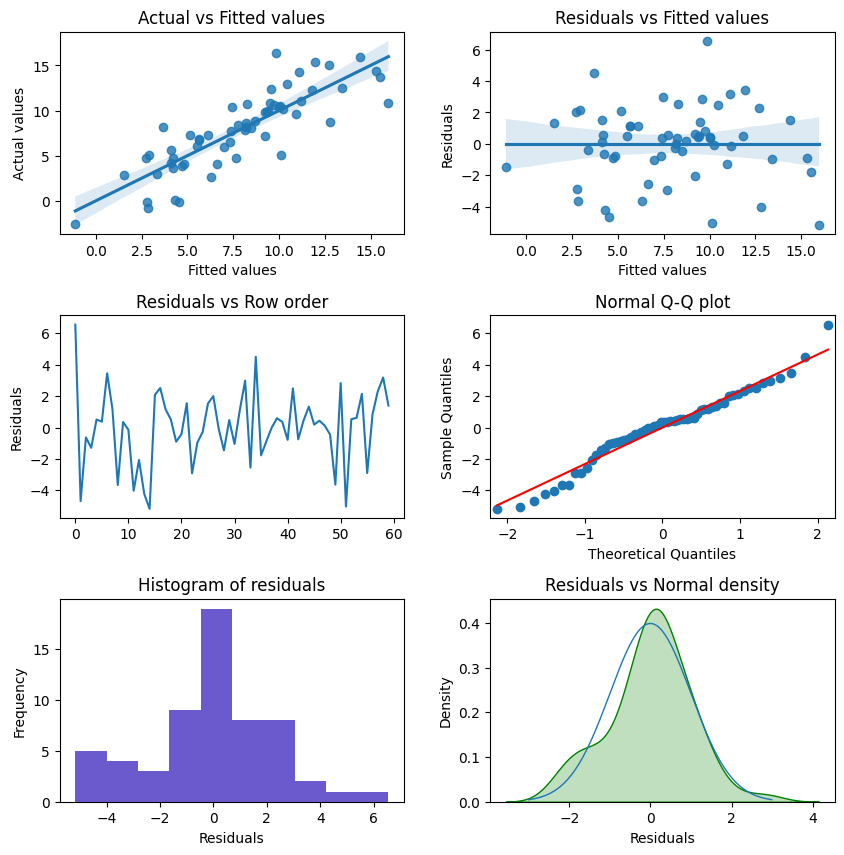

In [23]:
regression_4 = rsm.regress({"CroqPainFix_t": CroqPainFix_t}, rvar='EARN_total', evar=['K', 'SIZE', 'EMPL', 'total', 'P15_total', 'P25_total', 'P35_total', 'P45_total', 'P55_total', 'INC', 'COMP_total', 'NCOMP_total', 'NREST_total', 'PRICE', 'CLI'])
regression_4.summary(vif=True)
regression_4.plot('dashboard')

### STEP-WISE REGRESSION (RADIANT)

In [25]:
#Saving the transformed parquet file in local for use in Radiant

file_path = 'CroqPainFix_t.parquet'
CroqPainFix_t.to_parquet(file_path, index=False)


### The result for step-wise regression for untransformed data can be found in the image saved as "Step-wise Untransformed".
### The result for step-wise regression for transformed data can be found in the image saved as "Step-wise Transformed"

In [45]:
#Filtering the most significant explanatory variables based on step-wise regression results
regression_5 = rsm.regress({"CroqPainFix_t": CroqPainFix_t}, rvar='EARN_total', evar=['K', 'SIZE', 'P15_total', 'INC', 'NREST_total'])
regression_5.summary(vif=True)

Linear regression (OLS)
Data                 : CroqPainFix_t
Response variable    : EARN_total
Explanatory variables: K, SIZE, P15_total, INC, NREST_total
Null hyp.: the effect of x on EARN_total is zero
Alt. hyp.: the effect of x on EARN_total is not zero

             coefficient  std.error  t.value p.value     
Intercept         -18.67      4.046   -4.614  < .001  ***
K                  -0.01      0.002   -3.178   0.002   **
SIZE                0.07      0.011    6.577  < .001  ***
P15_total          39.73     16.021    2.480   0.016    *
INC                 0.50      0.110    4.506  < .001  ***
NREST_total         1.19      0.201    5.934  < .001  ***

Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

R-squared: 0.674, Adjusted R-squared: 0.644
F-statistic: 22.338 df(5, 54), p.value < 0.001
Nr obs: 60

Variance inflation factors:

               vif    Rsq
K            3.157  0.683
SIZE         2.966  0.663
P15_total    1.225  0.183
INC          1.130  0.115
NREST_tot

## FINAL MODEL RECOMMENDATIONS

In conclusion, our final recommendation is to proceed with the model that includes transformed variables. The significant variables picked based on model observations exactly align with the result of step-wise regression for the transformed model. As far as untransformed model is concerned, the only significant variables that the step-wise regression result showed are COMP and NCOMP with the coefficient for NCOMP as negative. The negative value of coefficient for NCOMP states that with a unit increase in number of chains we do not compete with, there will be a decrease in operational earnings. This does not make rational sense which is also lead us to not pick the untransformed model.

Therefore, we will move forward with the model comprising the following explanatory variables:

- K
- SIZE
- P15_total
- INC
- NREST_total

This selection ensures that we have a consistent and effective model for our analysis.

# Part B

In [26]:
#Considering the first 50 data points which correspond to stores opened before 1994
CroqPainFixt_b = CroqPainFix_t.copy()
CroqPainFixt_b50 = CroqPainFixt_b[0:51]

#Conducting regression on first 50 untransformed data points with only the significant variables
regression_6 = rsm.regress({"CroqPainFixt_b50": CroqPainFixt_b50}, rvar='EARN_total', evar=['K', 'SIZE', 'P15_total', 'INC', 'NREST_total'])
regression_6.summary(vif=True)

Linear regression (OLS)
Data                 : CroqPainFixt_b50
Response variable    : EARN_total
Explanatory variables: K, SIZE, P15_total, INC, NREST_total
Null hyp.: the effect of x on EARN_total is zero
Alt. hyp.: the effect of x on EARN_total is not zero

             coefficient  std.error  t.value p.value     
Intercept         -19.91      4.549   -4.376  < .001  ***
K                  -0.01      0.002   -2.671    0.01    *
SIZE                0.06      0.012    5.129  < .001  ***
P15_total          38.36     18.513    2.072   0.044    *
INC                 0.55      0.125    4.435  < .001  ***
NREST_total         1.27      0.219    5.807  < .001  ***

Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

R-squared: 0.661, Adjusted R-squared: 0.623
F-statistic: 17.551 df(5, 45), p.value < 0.001
Nr obs: 51

Variance inflation factors:

               vif    Rsq
K            2.903  0.656
SIZE         2.688  0.628
P15_total    1.358  0.264
INC          1.245  0.197
NREST_

In [27]:
#Filtering stores opened in 1994
CroqPainFix1994_val = CroqPainFixt_b[50:61]
CroqPainFix1994_val

,STOR,K,SIZE,EMPL,total,INC,PRICE,CLI,CITY,EARN_total,P15_total,P25_total,P35_total,P45_total,P55_total,COMP_total,NCOMP_total,NREST_total
50,51,775.9792,146,11.0,17.44,32.1,11.6,124,,12.401398,0.160550,0.134748,0.182339,0.174885,0.314794,0.114679,0.344037,1.490826
51,52,647.7520,62,11.0,12.88,32.7,18.0,125,,5.100431,0.156832,0.138199,0.218168,0.232919,0.156056,0.543478,0.543478,5.434783
52,53,689.8432,96,9.0,14.31,30.0,13.6,134,,4.726614,0.162124,0.072676,0.169113,0.193571,0.306080,0.069881,0.419287,0.489168
53,54,715.0180,86,10.0,12.99,34.4,16.5,122,,9.849325,0.190916,0.183218,0.194765,0.205543,0.109315,0.230947,0.384911,1.308699
54,55,650.0608,88,8.0,16.38,28.8,12.8,134,,5.063397,0.114164,0.200855,0.153846,0.162393,0.268010,0.183150,0.183150,0.976801
55,56,788.4112,72,7.0,21.36,28.7,24.3,129,,-0.134840,0.154963,0.168071,0.174625,0.185861,0.255150,0.093633,0.374532,0.468165
56,57,781.9510,119,7.0,23.40,33.4,13.3,121,,10.587063,0.154701,0.163248,0.242735,0.182051,0.258974,0.085470,0.427350,2.692308
57,58,1557.8410,285,8.0,22.83,27.6,18.3,116,,15.024783,0.182216,0.053876,0.224266,0.227770,0.248357,0.087604,0.131406,1.752081
58,59,935.5750,193,8.0,13.51,28.7,12.5,112,,14.296178,0.144338,0.174685,0.170984,0.171725,0.257587,0.074019,0.666173,2.516654
59,60,687.9784,92,12.0,25.49,36.0,14.1,127,,10.887701,0.191840,0.070616,0.238133,0.233817,0.231071,0.039231,0.313849,1.216163


In [28]:
#Based on the regression model for stores opened before 1994, we will be predicting the stores opened in 1994 meeting our performance criteria
predictions1994 = regression_6.predict(CroqPainFix1994_val)
predictions1994['untransformed_prediction'] = predictions1994['prediction'] * CroqPainFix1994_val['total']
predictions1994['performance_ratio'] = predictions1994['untransformed_prediction']/predictions1994['K']
predictions1994[predictions1994['performance_ratio'] > 0.26]

,K,SIZE,P15_total,INC,NREST_total,prediction,untransformed_prediction,performance_ratio
56,781.9510,119,0.154701,33.4,2.692308,10.247168,239.783733,0.306648
59,687.9784,92,0.191840,36.0,1.216163,10.163079,259.056875,0.376548


In [29]:
#Filtering all the information pertaining to stores 56 and 59
df.iloc[[56, 59]]

,STOR,EARN,K,SIZE,EMPL,total,P15,P25,P35,P45,P55,INC,COMP,NCOMP,NREST,PRICE,CLI,CITY
56,57,247.737268,781.9510,119,7.0,23.40,3.62,3.82,5.68,4.26,6.06,33.4,2,10,63,13.3,121,
59,60,277.527489,687.9784,92,12.0,25.49,4.89,1.80,6.07,5.96,5.89,36.0,1,8,31,14.1,127,


## If this prediction model was used before opening stores in 1994, only stores 56 nd 59 out of the 10 stores that actually opened would have been chosen.

# Part C

In [31]:
#Filtering 1996 data of potential store locations
CroqPain1996 = df.copy()
CroqPain1996 = CroqPain1996[-10:]
CroqPain1996

,STOR,EARN,K,SIZE,EMPL,total,P15,P25,P35,P45,P55,INC,COMP,NCOMP,NREST,PRICE,CLI,CITY
60,61,NaN,660.1396,54,NaN,6.71,0.60,2.57,0.43,0.690,1.44,38.4,4,5,18,21.7,131,Calais
61,62,NaN,733.0000,120,NaN,11.04,1.30,1.40,2.11,1.090,2.68,31.3,7,6,21,12.5,115,Montchanin
62,63,NaN,1050.3490,135,NaN,11.91,2.21,1.85,2.33,2.240,2.17,29.0,1,4,13,21.7,135,Aubusson
63,64,NaN,836.0000,245,NaN,11.35,3.40,3.00,2.57,1.200,1.35,37.0,5,8,62,12.5,136,Toulouse
64,65,NaN,783.6160,96,NaN,3.50,0.26,0.70,0.50,1.200,2.00,30.0,12,7,38,18.0,130,Torcy
65,66,NaN,924.8080,197,NaN,12.72,1.65,1.96,2.30,1.780,4.39,23.0,1,9,41,12.0,136,Marseilles-1
66,67,NaN,1089.5764,93,NaN,16.66,2.57,2.94,2.82,2.720,4.45,25.2,2,0,5,33.4,133,Marseilles-2
67,68,NaN,737.6620,169,NaN,9.41,0.78,1.94,0.88,1.080,3.45,30.1,4,4,11,9.0,126,Clermont
68,69,NaN,584.0000,149,NaN,19.02,2.50,2.68,4.60,4.567,3.00,28.6,4,5,26,13.4,128,Montpellier
69,70,NaN,681.0000,150,NaN,12.65,1.65,1.32,1.00,3.400,2.37,34.9,3,12,54,15.4,128,Dijon


In [32]:
#Transforming the input data
CroqPain1996_t = CroqPain1996.copy()
CroqPain1996_t['P15_total'] = CroqPain1996_t['P15'] / CroqPain1996_t['total']
CroqPain1996_t['P25_total'] = CroqPain1996_t['P25'] / CroqPain1996_t['total']
CroqPain1996_t['P35_total'] = CroqPain1996_t['P35'] / CroqPain1996_t['total']
CroqPain1996_t['P45_total'] = CroqPain1996_t['P45'] / CroqPain1996_t['total']
CroqPain1996_t['P55_total'] = CroqPain1996_t['P55'] / CroqPain1996_t['total']
CroqPain1996_t['COMP_total'] = CroqPain1996_t['COMP'] / CroqPain1996_t['total']
CroqPain1996_t['NCOMP_total'] = CroqPain1996_t['NCOMP'] / CroqPain1996_t['total']
CroqPain1996_t['NREST_total'] = CroqPain1996_t['NREST'] / CroqPain1996_t['total']


In [33]:
#Conducting regression on all the stores opened thus far based on the model chosen

regression_7 = rsm.regress({"CroqPainFix_t": CroqPainFix_t}, rvar='EARN_total', evar=['K', 'SIZE', 'P15_total', 'INC', 'NREST_total'])
regression_7.summary(vif=True)

Linear regression (OLS)
Data                 : CroqPainFix_t
Response variable    : EARN_total
Explanatory variables: K, SIZE, P15_total, INC, NREST_total
Null hyp.: the effect of x on EARN_total is zero
Alt. hyp.: the effect of x on EARN_total is not zero

             coefficient  std.error  t.value p.value     
Intercept         -18.67      4.046   -4.614  < .001  ***
K                  -0.01      0.002   -3.178   0.002   **
SIZE                0.07      0.011    6.577  < .001  ***
P15_total          39.73     16.021    2.480   0.016    *
INC                 0.50      0.110    4.506  < .001  ***
NREST_total         1.19      0.201    5.934  < .001  ***

Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

R-squared: 0.674, Adjusted R-squared: 0.644
F-statistic: 22.338 df(5, 54), p.value < 0.001
Nr obs: 60

Variance inflation factors:

               vif    Rsq
K            3.157  0.683
SIZE         2.966  0.663
P15_total    1.225  0.183
INC          1.130  0.115
NREST_tot

In [49]:
#Based on the regression model for all the stores opened thus far, we will be predicting the stores that would meet our performance criteria from the potential list of 1996

prediction = regression_7.predict(CroqPain1996_t)
prediction['earn_prediction'] = prediction['prediction'] * CroqPain1996_t['total']
prediction['performance_ratio'] = prediction['earn_prediction'] / prediction['K']
prediction[prediction['performance_ratio'] > 0.26]

,K,SIZE,P15_total,INC,NREST_total,prediction,earn_prediction,performance_ratio
63,836.0,245,0.299559,37.0,5.462555,29.606297,336.031466,0.401952
68,584.0,149,0.131441,28.6,1.366982,8.830043,167.947418,0.287581
69,681.0,150,0.130435,34.9,4.268775,14.753157,186.627432,0.274049


In [50]:
#Filtering all the information pertaining to stores 63, 68 and 69

df.iloc[[63,68,69]]

,STOR,EARN,K,SIZE,EMPL,total,P15,P25,P35,P45,P55,INC,COMP,NCOMP,NREST,PRICE,CLI,CITY
63,64,NaN,836.0,245,NaN,11.35,3.40,3.00,2.57,1.200,1.35,37.0,5,8,62,12.5,136,Toulouse
68,69,NaN,584.0,149,NaN,19.02,2.50,2.68,4.60,4.567,3.00,28.6,4,5,26,13.4,128,Montpellier
69,70,NaN,681.0,150,NaN,12.65,1.65,1.32,1.00,3.400,2.37,34.9,3,12,54,15.4,128,Dijon


# Based on our model, we recommend opening stores in the following cities: Toulouse, Montpellier and Dijon